In [1]:
import pyodbc
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sweetviz as sv

In [2]:
#import file from SQL
#-------------------------

conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=DESKTOP-MLT0SLQ\SQLEXPRESS;'
                      'Database=Dengue;'
                      'Trusted_Connection=yes;')
cursor = conn.cursor()
df = pd.read_sql_query('SELECT * FROM Dengue_flat_file2 order by city_name, weekofyear',conn)
df.head()

city_name   max_temp   min_temp        DTR    rain  dew_point  \
0  Coronel_Pacheco  30.500000  17.385000  13.115000   23.08  16.820833   
1  Coronel_Pacheco  33.800000  18.942857  14.857143    2.60  17.675595   
2  Coronel_Pacheco  30.942857  19.542857  11.400000   20.80  18.796429   
3  Coronel_Pacheco  27.257143  19.400000   7.857143  115.80  18.836310   
4  Coronel_Pacheco  26.542857  17.485714   9.057143  110.60  17.506548   

   atm_pressure  avg_humidity  min_humidity      Gust  avg_wind  weekofyear  \
0    965.955208     73.302083     40.250000  9.975000  1.661458      201242   
1    964.024405     67.529762     32.857143  8.271429  1.630357      201243   
2    962.893452     75.940476     49.285714  9.828571  1.503571      201244   
3    964.380953     81.071429     59.142857  8.442857  1.662500      201245   
4    964.815476     82.226190     57.285714  7.157143  1.369048      201246   

   year  month  week  altitude  city_dens  non_Dengue_cases  Dengue_cases  
0  2012     10    42       NaN        NaN                 0             0  
1  2012     10    43       NaN        NaN                 0             0  
2  2012     10    44       NaN        NaN                 0             0  
3  2012     11    45       NaN        NaN                 0             0  
4  2012     11    46       NaN        NaN                 0             0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2030 entries, 0 to 2029
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   city_name         2030 non-null   object 
 1   max_temp          2030 non-null   float64
 2   min_temp          2030 non-null   float64
 3   DTR               2030 non-null   float64
 4   rain              2030 non-null   float64
 5   dew_point         2030 non-null   float64
 6   atm_pressure      2030 non-null   float64
 7   avg_humidity      2030 non-null   float64
 8   min_humidity      2030 non-null   float64
 9   Gust              2030 non-null   float64
 10  avg_wind          2030 non-null   float64
 11  weekofyear        2030 non-null   int64  
 12  year              2030 non-null   int64  
 13  month             2030 non-null   int64  
 14  week              2030 non-null   int64  
 15  altitude          1109 non-null   float64
 16  city_dens         1109 non-null   float64


In [4]:
df[df['week']>= 52]

city_name   max_temp   min_temp        DTR    rain  dew_point  \
10    Coronel_Pacheco  33.242857  19.557143  13.685714   10.80  19.814286   
62    Coronel_Pacheco  30.457143  20.942857   9.514286  163.00  21.127976   
114   Coronel_Pacheco  32.228571  19.728571  12.500000   75.80  19.797024   
166   Coronel_Pacheco  32.671429  18.885714  13.785714    1.20  19.283929   
167   Coronel_Pacheco  32.028571  20.542857  11.485714   34.40  20.764881   
219   Coronel_Pacheco  35.485714  19.285714  16.200000    0.40  19.094643   
268   Coronel_Pacheco  33.714286  23.442857  10.271429   25.20  22.259524   
320   Coronel_Pacheco  31.685714  22.342857   9.342857   69.80  21.645238   
372   Coronel_Pacheco  31.914286  21.971429   9.942857  115.60  20.728572   
374      Juiz_de_fora  21.600000  18.600000   3.000000   22.60  18.979167   
426      Juiz_de_fora  30.042857  19.471429  10.571429   11.20  17.963691   
478      Juiz_de_fora  27.128571  18.742857   8.385714  188.60  18.969048   
530      Juiz_de_fora  28.900000  18.628571  10.271429   64.80  17.818452   
582      Juiz_de_fora  28.514286  18.814286   9.700000   12.60  17.626786   
583      Juiz_de_fora  28.371429  19.714286   8.657143   52.40  18.425000   
635      Juiz_de_fora  30.528571  20.100000  10.428571   47.60  17.726786   
687      Juiz_de_fora  26.671429  19.214286   7.457143   35.00  18.736905   
739      Juiz_de_fora  24.528571  17.528571   7.000000  204.40  18.155952   
789      Juiz_de_fora  26.185714  17.328571   8.857143  111.80  17.310714   
791          Manhuacu  24.100000  20.000000   4.100000    0.00  18.491667   
843          Manhuacu  30.157143  18.600000  11.557143    9.60  17.584524   
895          Manhuacu  28.228571  19.357143   8.871429    7.00  18.792857   
947          Manhuacu  29.514286  17.671429  11.842857   44.00  17.548214   
999          Manhuacu  28.628571  17.342857  11.285714    0.04  16.144643   
1000         Manhuacu  30.642857  18.300000  12.342857    3.00  17.695833   
1052         Manhuacu  29.642857  16.885714  12.757143   22.20  17.493452   
1087         Manhuacu  29.957143  19.000000  10.957143   19.00  18.530357   
1139         Manhuacu  27.085714  18.457143   8.628571  104.00  18.380357   
1191         Manhuacu  27.542857  18.357143   9.185714   81.20  17.488095   
1193           Muriae  27.000000  22.000000   5.000000   21.80  22.795833   
1245           Muriae  35.828571  21.985714  13.842857    2.60  19.467262   
1297           Muriae  32.242857  21.700000  10.542857  114.60  21.494047   
1349           Muriae  33.685714  21.385714  12.300000   26.60  20.253571   
1401           Muriae  34.485714  21.014286  13.471429    0.00  19.242262   
1402           Muriae  34.928571  21.842857  13.085714   30.20  19.360714   
1454           Muriae  35.800000  22.142857  13.657143   11.60  19.910119   
1505           Muriae  33.285714  22.071429  11.214286   15.20  21.011905   
1557           Muriae  29.585714  20.728571   8.857143   58.20  20.416071   
1609           Muriae  30.971429  20.771429  10.200000   52.00  20.289286   
1611           Vicosa  22.600000  19.100000   3.500000   22.40  19.012500   
1663           Vicosa  31.400000  18.528571  12.871429   19.60  18.555357   
1715           Vicosa  28.871429  20.300000   8.571429   56.00  19.910714   
1767           Vicosa  31.100000  19.242857  11.857143   21.00  18.749405   
1819           Vicosa  30.742857  17.614286  13.128571    0.00  17.333333   
1820           Vicosa  31.085714  19.242857  11.842857   20.00  19.095238   
1872           Vicosa  31.657143  17.985714  13.671429    0.20  18.087500   
1924           Vicosa  30.542857  19.728571  10.814286   86.20  19.567262   
1976           Vicosa  28.228571  18.828571   9.400000   52.80  19.201190   
2028           Vicosa  28.400000  18.671429   9.728571   41.00  18.520238   

      atm_pressure  avg_humidity  min_humidity       Gust  avg_wind  \
10      963.991667     74.041667     40.000000   8.785714  1.600595   
62      964.550604 

In [5]:
# fix mothn in cases of week 52 or 53

week_con = df['week'] >= 52
month_con = df['month'] == 1

df['month'].mask(week_con & month_con, 12, inplace = True)

In [6]:
df[df['week']>= 52]

city_name   max_temp   min_temp        DTR    rain  dew_point  \
10    Coronel_Pacheco  33.242857  19.557143  13.685714   10.80  19.814286   
62    Coronel_Pacheco  30.457143  20.942857   9.514286  163.00  21.127976   
114   Coronel_Pacheco  32.228571  19.728571  12.500000   75.80  19.797024   
166   Coronel_Pacheco  32.671429  18.885714  13.785714    1.20  19.283929   
167   Coronel_Pacheco  32.028571  20.542857  11.485714   34.40  20.764881   
219   Coronel_Pacheco  35.485714  19.285714  16.200000    0.40  19.094643   
268   Coronel_Pacheco  33.714286  23.442857  10.271429   25.20  22.259524   
320   Coronel_Pacheco  31.685714  22.342857   9.342857   69.80  21.645238   
372   Coronel_Pacheco  31.914286  21.971429   9.942857  115.60  20.728572   
374      Juiz_de_fora  21.600000  18.600000   3.000000   22.60  18.979167   
426      Juiz_de_fora  30.042857  19.471429  10.571429   11.20  17.963691   
478      Juiz_de_fora  27.128571  18.742857   8.385714  188.60  18.969048   
530      Juiz_de_fora  28.900000  18.628571  10.271429   64.80  17.818452   
582      Juiz_de_fora  28.514286  18.814286   9.700000   12.60  17.626786   
583      Juiz_de_fora  28.371429  19.714286   8.657143   52.40  18.425000   
635      Juiz_de_fora  30.528571  20.100000  10.428571   47.60  17.726786   
687      Juiz_de_fora  26.671429  19.214286   7.457143   35.00  18.736905   
739      Juiz_de_fora  24.528571  17.528571   7.000000  204.40  18.155952   
789      Juiz_de_fora  26.185714  17.328571   8.857143  111.80  17.310714   
791          Manhuacu  24.100000  20.000000   4.100000    0.00  18.491667   
843          Manhuacu  30.157143  18.600000  11.557143    9.60  17.584524   
895          Manhuacu  28.228571  19.357143   8.871429    7.00  18.792857   
947          Manhuacu  29.514286  17.671429  11.842857   44.00  17.548214   
999          Manhuacu  28.628571  17.342857  11.285714    0.04  16.144643   
1000         Manhuacu  30.642857  18.300000  12.342857    3.00  17.695833   
1052         Manhuacu  29.642857  16.885714  12.757143   22.20  17.493452   
1087         Manhuacu  29.957143  19.000000  10.957143   19.00  18.530357   
1139         Manhuacu  27.085714  18.457143   8.628571  104.00  18.380357   
1191         Manhuacu  27.542857  18.357143   9.185714   81.20  17.488095   
1193           Muriae  27.000000  22.000000   5.000000   21.80  22.795833   
1245           Muriae  35.828571  21.985714  13.842857    2.60  19.467262   
1297           Muriae  32.242857  21.700000  10.542857  114.60  21.494047   
1349           Muriae  33.685714  21.385714  12.300000   26.60  20.253571   
1401           Muriae  34.485714  21.014286  13.471429    0.00  19.242262   
1402           Muriae  34.928571  21.842857  13.085714   30.20  19.360714   
1454           Muriae  35.800000  22.142857  13.657143   11.60  19.910119   
1505           Muriae  33.285714  22.071429  11.214286   15.20  21.011905   
1557           Muriae  29.585714  20.728571   8.857143   58.20  20.416071   
1609           Muriae  30.971429  20.771429  10.200000   52.00  20.289286   
1611           Vicosa  22.600000  19.100000   3.500000   22.40  19.012500   
1663           Vicosa  31.400000  18.528571  12.871429   19.60  18.555357   
1715           Vicosa  28.871429  20.300000   8.571429   56.00  19.910714   
1767           Vicosa  31.100000  19.242857  11.857143   21.00  18.749405   
1819           Vicosa  30.742857  17.614286  13.128571    0.00  17.333333   
1820           Vicosa  31.085714  19.242857  11.842857   20.00  19.095238   
1872           Vicosa  31.657143  17.985714  13.671429    0.20  18.087500   
1924           Vicosa  30.542857  19.728571  10.814286   86.20  19.567262   
1976           Vicosa  28.228571  18.828571   9.400000   52.80  19.201190   
2028           Vicosa  28.400000  18.671429   9.728571   41.00  18.520238   

      atm_pressure  avg_humidity  min_humidity       Gust  avg_wind  \
10      963.991667     74.041667     40.000000   8.785714  1.600595   
62      964.550604 

In [7]:
# fill nulls in city_dens and altitude that were added in the join operation 

df.loc[df['city_name'] == 'Manhuacu', 'altitude'] = 819.47
df.loc[df['city_name'] == 'Vicosa', 'altitude'] = 697.64
df.loc[df['city_name'] == 'Juiz_de_fora', 'altitude'] = 936.88
df.loc[df['city_name'] == 'Muriae', 'altitude'] = 282.79
df.loc[df['city_name'] == 'Coronel_Pacheco', 'altitude'] = 411.14

df.loc[df['city_name'] == 'Manhuacu', 'city_dens'] = 145.1
df.loc[df['city_name'] == 'Vicosa', 'city_dens'] = 263.3
df.loc[df['city_name'] == 'Juiz_de_fora', 'city_dens'] = 396.2
df.loc[df['city_name'] == 'Muriae', 'city_dens'] = 129.2
df.loc[df['city_name'] == 'Coronel_Pacheco', 'city_dens'] = 23.5

df.isnull().sum()

city_name           0
max_temp            0
min_temp            0
DTR                 0
rain                0
dew_point           0
atm_pressure        0
avg_humidity        0
min_humidity        0
Gust                0
avg_wind            0
weekofyear          0
year                0
month               0
week                0
altitude            0
city_dens           0
non_Dengue_cases    0
Dengue_cases        0
dtype: int64

### Descriptive statistics and Visualization

In [8]:
df.describe(include = 'all')

city_name     max_temp     min_temp          DTR         rain  \
count       2030  2030.000000  2030.000000  2030.000000  2030.000000   
unique         5          NaN          NaN          NaN          NaN   
top       Vicosa          NaN          NaN          NaN          NaN   
freq         419          NaN          NaN          NaN          NaN   
mean         NaN    27.487493    16.806526    10.680967    24.576473   
std          NaN     3.611714     3.138943     2.703262    36.202449   
min          NaN    17.714286     6.300000     2.500000     0.000000   
25%          NaN    24.914286    14.600000     8.742857     0.600000   
50%          NaN    27.471429    17.228571    10.442857     9.000000   
75%          NaN    29.900000    18.928571    12.485714    34.200000   
max          NaN    38.971429    25.033333    20.471429   371.200000   

          dew_point  atm_pressure  avg_humidity  min_humidity         Gust  \
count   2030.000000   2030.000000   2030.000000   2030.000000  2030.000000   
unique          NaN           NaN           NaN           NaN          NaN   
top             NaN           NaN           NaN           NaN          NaN   
freq            NaN           NaN           NaN           NaN          NaN   
mean      16.374338    944.399295     76.815127     50.174272     8.189886   
std        2.763449     26.738906      7.067920     10.347459     1.817555   
min        8.548809    903.945833     47.993437     22.000000     3.500000   
25%       14.248958    922.148363     72.251488     42.857143     6.857143   
50%       16.691666    936.642262     77.592262     50.000000     8.100000   
75%       18.427232    970.070684     82.041667     57.285714     9.428571   
max       22.945421    993.916072     95.666667     91.000000    16.828571   

           avg_wind     weekofyear         year        month        week  \
count   2030.000000    2030.000000  2030.000000  2030.000000  2030.00000   
unique          NaN            NaN          NaN          NaN         NaN   
top             NaN            NaN          NaN          NaN         NaN   
freq            NaN            NaN          NaN          NaN         NaN   
mean       1.576450  201581.927586  2015.552709     6.444828    26.65665   
std        0.770242     227.850472     2.277438     3.468319    15.16113   
min        0.259524  201152.000000  2011.000000     1.000000     1.00000   
25%        0.983780  201405.250000  2014.000000     3.000000    14.00000   
50%        1.383036  201602.000000  2016.000000     6.000000    27.00000   
75%        2.135119  201803.750000  2018.000000     9.000000    40.00000   
max        4.426786  202001.000000  2020.000000    12.000000    53.00000   

           altitude    city_dens  non_Dengue_cases  Dengue_cases  
count   2030.000000  2030.000000       2030.000000   2030.000000  
unique          NaN          NaN               NaN           NaN  
top             NaN          NaN               NaN           NaN  
freq            NaN          NaN               NaN           NaN  
mean     632.704256   195.400443          0.508867     32.463547  
std      247.123424   126.845138          2.826801    195.970418  
min      282.790000    23.500000          0.000000      0.000000  
25%      411.140000   129.200000          0.000000      0.000000  
50%      697.640000   145.100000          0.000000      0.000000  
75%      819.470000   263.300000          0.000000      4.000000  
max      936.880000   396.200000         57.000000   3015.000000

In [9]:
#report = sv.analyze(df)
#report.show_html('Initial_flat_file.html')

---------
The sweetviz report shows that the rain distribution is very skewed and the atmospheric pressure distribution is not continuous. <br>This would be treated after EDA.

---------
### Behavior of the outcome variable

<AxesSubplot:xlabel='Dengue_cases', ylabel='Count'>

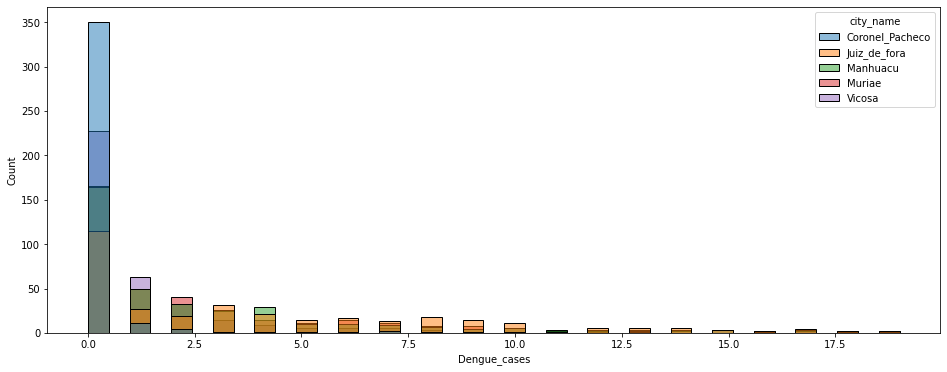

In [10]:
plt.figure(figsize=(16, 6))
sns.histplot(x= df.Dengue_cases[df.Dengue_cases<20], data = df,  hue= 'city_name')

<AxesSubplot:xlabel='Dengue_cases', ylabel='Count'>

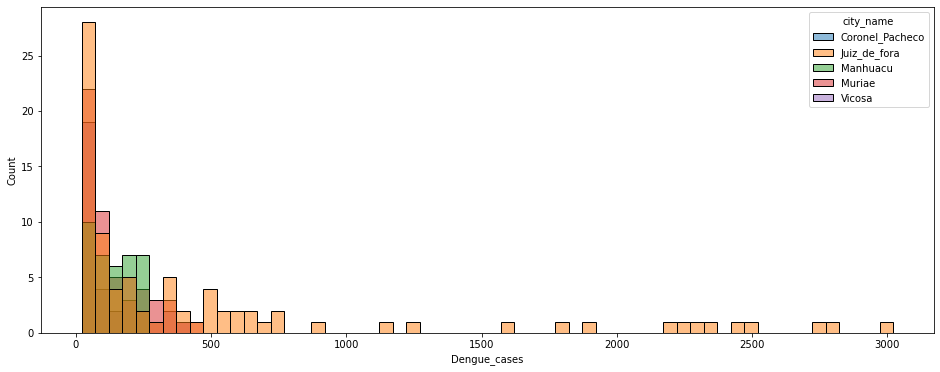

In [11]:
plt.figure(figsize=(16, 6))
sns.histplot(x= df.Dengue_cases[(df.Dengue_cases>20)], data = df, binwidth = 50, hue= 'city_name')

<AxesSubplot:xlabel='year', ylabel='Dengue_cases'>

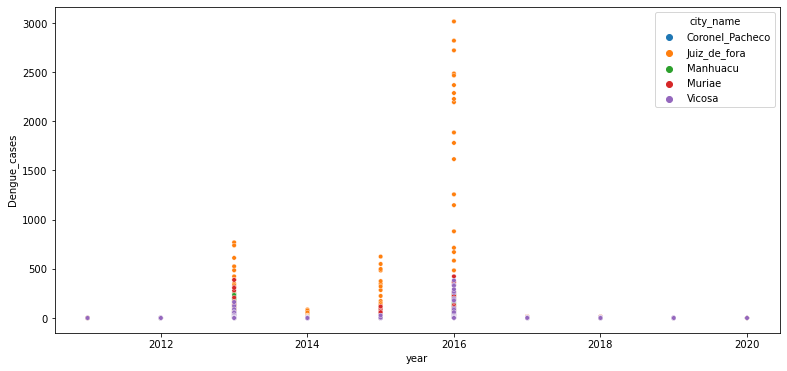

In [12]:
plt.figure(figsize=(13, 6))
sns.scatterplot(x="year", y= "Dengue_cases", hue= 'city_name', s= 20, data = df)

2016 had a severe outbreak, 2013 and 2015 had smaller outbreaks.

-----

Text(0.5, 1.0, 'Number of cases per month')

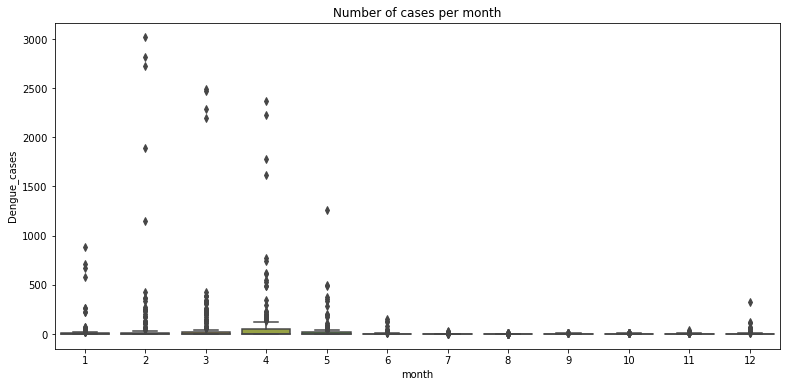

In [13]:
plt.figure(figsize=(13, 6))
sns.boxplot(x= 'month', y= 'Dengue_cases', data = df)
plt.title("Number of cases per month")

<AxesSubplot:xlabel='week', ylabel='Dengue_cases'>

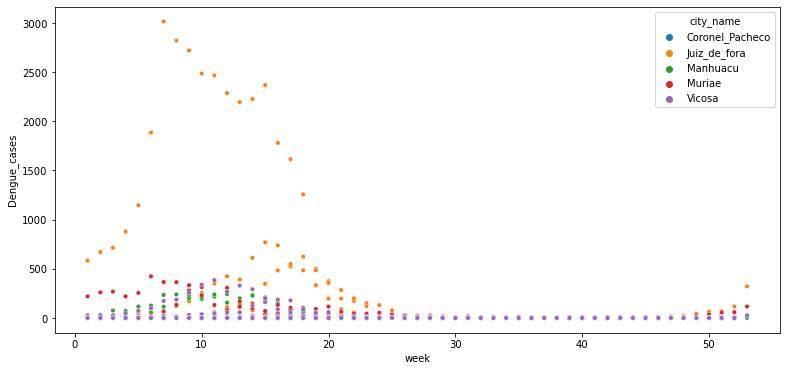

In [14]:
plt.figure(figsize=(13, 6))
sns.scatterplot(x="week", y= "Dengue_cases", hue= 'city_name', s= 20, data = df)

<AxesSubplot:xlabel='month', ylabel='Dengue_cases'>

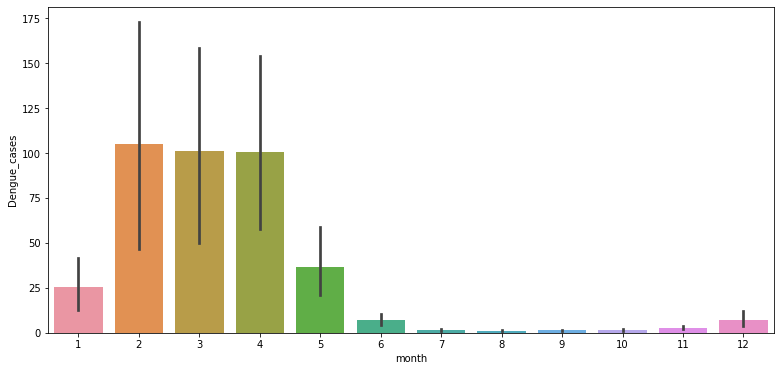

In [15]:
plt.figure(figsize=(13, 6))
sns.barplot(x= 'month', y= 'Dengue_cases', data = df)

Most infections occur from January to May

Text(0.5, 1.0, 'Number of cases per city')

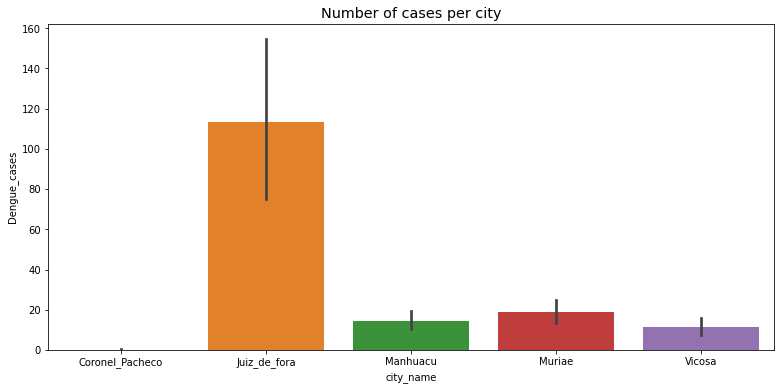

In [16]:
plt.figure(figsize=(13, 6))
sns.barplot(x= 'city_name', y= 'Dengue_cases', data = df)
plt.title("Number of cases per city", fontsize =  'x-large')

The city with the most cases is Juiz de Fora which is the largest city in the dataset with ~570,000 residents.
<br> Coronel Pacheco is the smallest city with only ~3,000 residents.

<AxesSubplot:xlabel='city_dens', ylabel='Dengue_cases'>

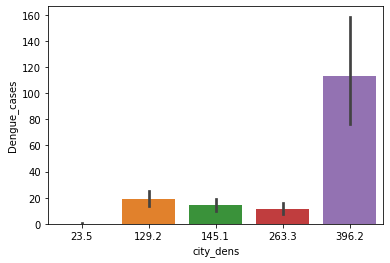

In [17]:
sns.barplot(x= 'city_dens', y= 'Dengue_cases', data = df)

----------
### The effect of climatic factors on the number of cases
(only for general impression, since this is climate data of the same week, and the final model will be with climate data of previous weeks)

Text(0.5, 1.0, 'Wind (avg)')

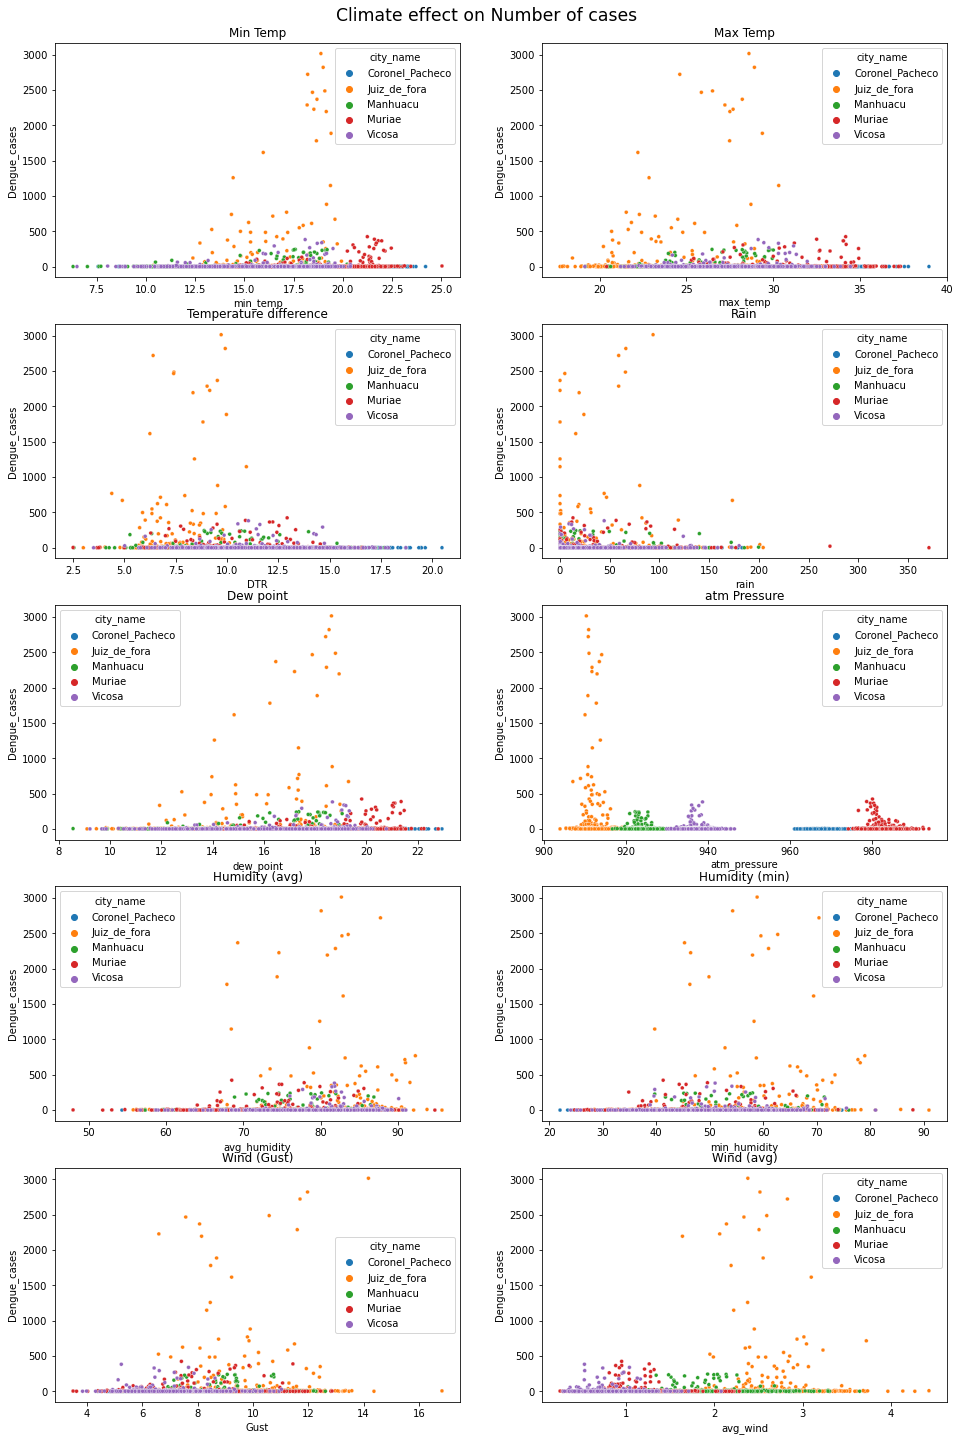

In [18]:
fig, axes = plt.subplots(5,2, figsize = (16,25))
fig.suptitle("Climate effect on Number of cases", y= 0.9, fontsize =  'xx-large')
sns.scatterplot(x="min_temp", y= "Dengue_cases", hue = 'city_name', data = df, s=15, ax= axes[0,0])
axes[0,0].set_title("Min Temp")
sns.scatterplot(x="max_temp", y= "Dengue_cases", hue = 'city_name', data = df, s=15, ax= axes[0,1])
axes[0,1].set_title("Max Temp")
sns.scatterplot(x="DTR", y= "Dengue_cases", hue = 'city_name', data = df, s=15, ax= axes[1,0])
axes[1,0].set_title("Temperature difference")
sns.scatterplot(x="rain", y= "Dengue_cases", hue = 'city_name',data = df, s=15, ax= axes[1,1])
axes[1,1].set_title("Rain")
sns.scatterplot(x="dew_point", y= "Dengue_cases", hue = 'city_name', data = df, s=15, ax= axes[2,0])
axes[2,0].set_title("Dew point")
sns.scatterplot(x="atm_pressure", y= "Dengue_cases", hue = 'city_name', data = df, s=15, ax= axes[2,1])
axes[2,1].set_title("atm Pressure")
sns.scatterplot(x="avg_humidity", y= "Dengue_cases",hue = 'city_name', data = df, s=15, ax= axes[3,0])
axes[3,0].set_title("Humidity (avg)")
sns.scatterplot(x="min_humidity", y= "Dengue_cases", hue = 'city_name', data = df,s=15, ax= axes[3,1])
axes[3,1].set_title("Humidity (min)")
sns.scatterplot(x="Gust", y= "Dengue_cases", hue = 'city_name', data = df, s=15, ax= axes[4,0])
axes[4,0].set_title("Wind (Gust)")
sns.scatterplot(x="avg_wind", y= "Dengue_cases", hue = 'city_name', data = df,s=15, ax= axes[4,1])
axes[4,1].set_title("Wind (avg)")

There is no clear pattern with any of the climate variables. 
<br>
Each city has a distinct range of atmospheric pressure, probably due to the altitude differences.

Text(0.5, 1.0, 'Wind (avg)')

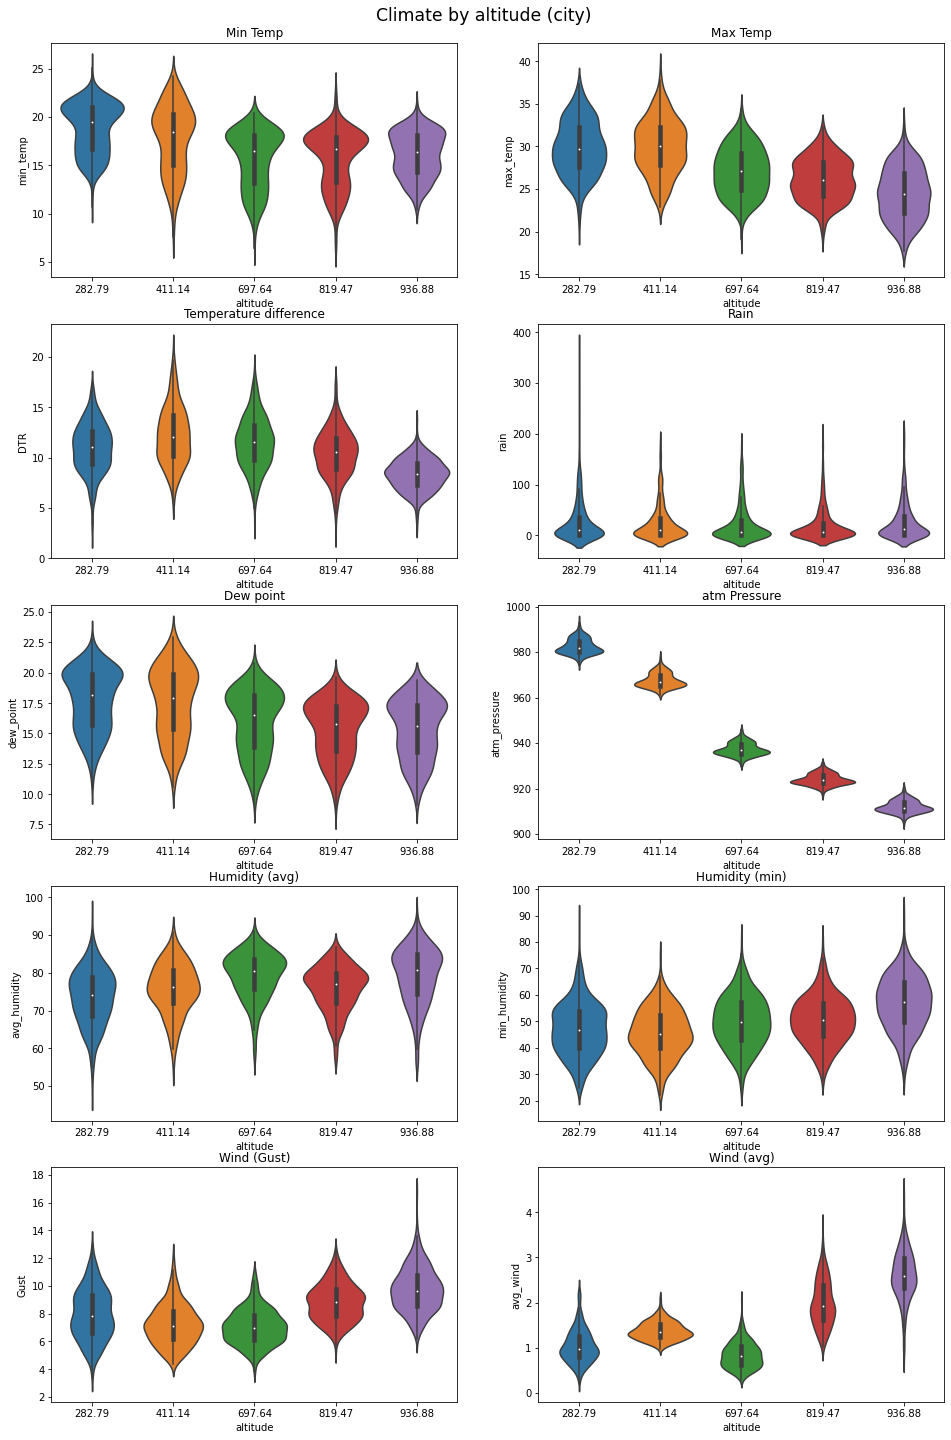

In [19]:
fig, axes = plt.subplots(5,2, figsize = (16,25))
fig.suptitle("Climate by altitude (city)", y= 0.9, fontsize =  'xx-large')
sns.violinplot(y="min_temp", x= 'altitude', data = df, ax= axes[0,0])
axes[0,0].set_title("Min Temp")
sns.violinplot(y="max_temp", x= 'altitude', data = df, ax= axes[0,1])
axes[0,1].set_title("Max Temp")
sns.violinplot(y="DTR", x= 'altitude', data = df, ax= axes[1,0])
axes[1,0].set_title("Temperature difference")
sns.violinplot(y="rain",x= 'altitude', data = df, ax= axes[1,1])
axes[1,1].set_title("Rain")
sns.violinplot(y="dew_point", x= 'altitude', data = df, ax= axes[2,0])
axes[2,0].set_title("Dew point")
sns.violinplot(y="atm_pressure", x= 'altitude', data = df, ax= axes[2,1])
axes[2,1].set_title("atm Pressure")
sns.violinplot(y="avg_humidity", x= 'altitude', data = df, ax= axes[3,0])
axes[3,0].set_title("Humidity (avg)")
sns.violinplot(y="min_humidity", x= 'altitude', data = df, ax= axes[3,1])
axes[3,1].set_title("Humidity (min)")
sns.violinplot(y="Gust", x= 'altitude', data = df, ax= axes[4,0])
axes[4,0].set_title("Wind (Gust)")
sns.violinplot(y="avg_wind",x= 'altitude', data = df, ax= axes[4,1])
axes[4,1].set_title("Wind (avg)")

The main differences between cities is the atmospheric pressure and the average wind speed

Text(0.5, 1.0, 'Wind (avg)')

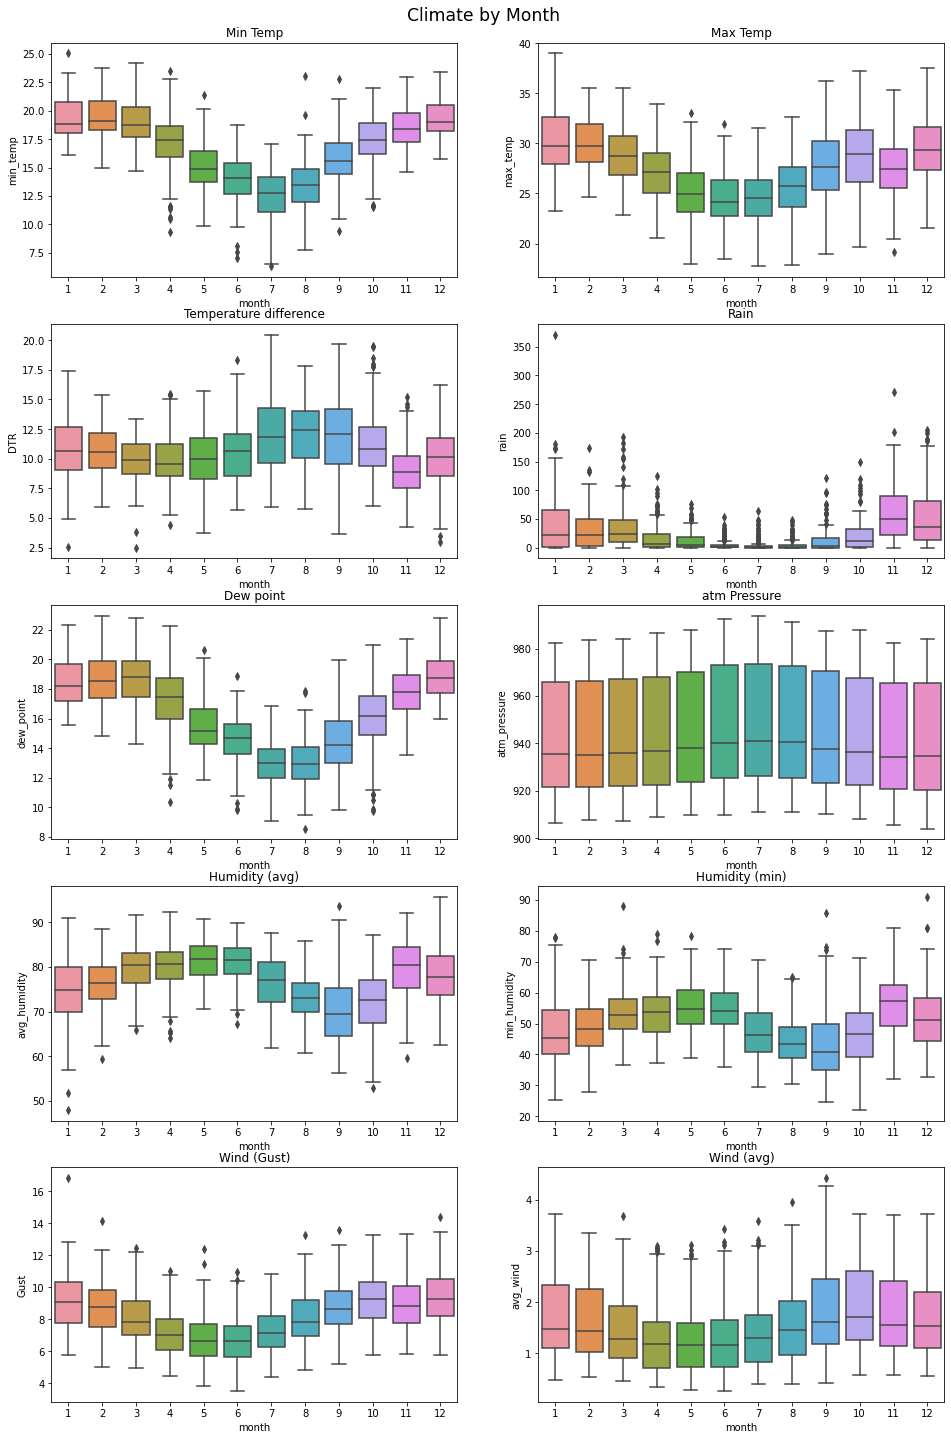

In [20]:
fig, axes = plt.subplots(5,2, figsize = (16,25))
fig.suptitle("Climate by Month", y= 0.9, fontsize =  'xx-large')
sns.boxplot(y="min_temp", x= 'month', data = df, ax= axes[0,0])
axes[0,0].set_title("Min Temp")
sns.boxplot(y="max_temp", x= 'month', data = df, ax= axes[0,1])
axes[0,1].set_title("Max Temp")
sns.boxplot(y="DTR", x= 'month', data = df, ax= axes[1,0])
axes[1,0].set_title("Temperature difference")
sns.boxplot(y="rain",x= 'month', data = df, ax= axes[1,1])
axes[1,1].set_title("Rain")
sns.boxplot(y="dew_point", x= 'month', data = df, ax= axes[2,0])
axes[2,0].set_title("Dew point")
sns.boxplot(y="atm_pressure", x= 'month', data = df, ax= axes[2,1])
axes[2,1].set_title("atm Pressure")
sns.boxplot(y="avg_humidity", x= 'month', data = df, ax= axes[3,0])
axes[3,0].set_title("Humidity (avg)")
sns.boxplot(y="min_humidity", x= 'month', data = df, ax= axes[3,1])
axes[3,1].set_title("Humidity (min)")
sns.boxplot(y="Gust", x= 'month', data = df, ax= axes[4,0])
axes[4,0].set_title("Wind (Gust)")
sns.boxplot(y="avg_wind",x= 'month', data = df, ax= axes[4,1])
axes[4,1].set_title("Wind (avg)")

The winter (June-September) is clod and dry, the summer is warm and rainy. 

### correlations between climate data

In [21]:
corrMatrix = df.corr(method = 'spearman')
corrMatrix.style.background_gradient(cmap='coolwarm')

There is high correlation 0.92 between dew point and minimum temperature. This will be addressed when doing feature selection.

<AxesSubplot:xlabel='min_temp', ylabel='dew_point'>

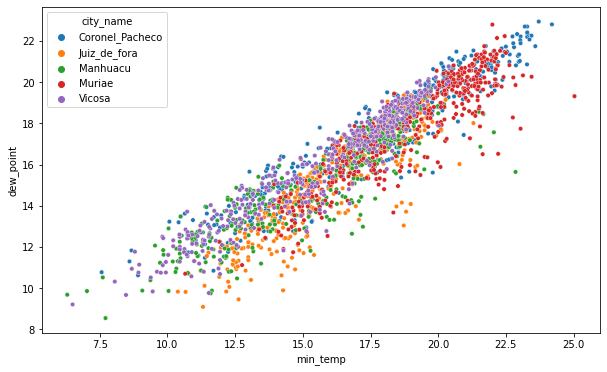

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="min_temp", y= "dew_point", hue = 'city_name',  s=20, data = df)

There is high correlation (0.87) between average humidity and minimum humidity.

<AxesSubplot:xlabel='min_humidity', ylabel='avg_humidity'>

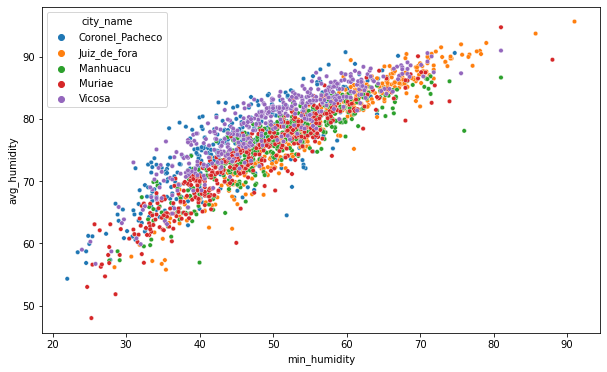

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="min_humidity", y= "avg_humidity", hue = 'city_name', s=20, data = df)

There is high negative correlation (-0.87) between DTR and minimum humidity.

<AxesSubplot:xlabel='DTR', ylabel='min_humidity'>

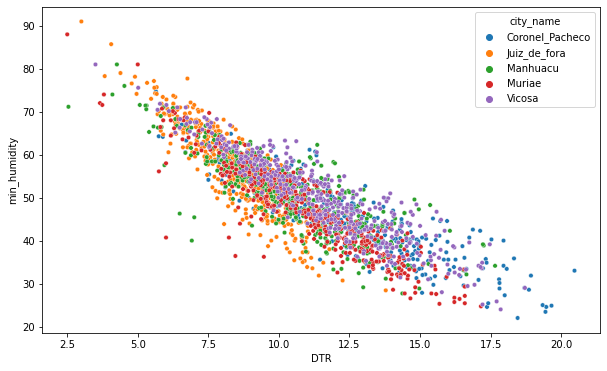

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="DTR", y= "min_humidity", hue = 'city_name',  s=20, data = df)

<AxesSubplot:xlabel='max_temp', ylabel='avg_humidity'>

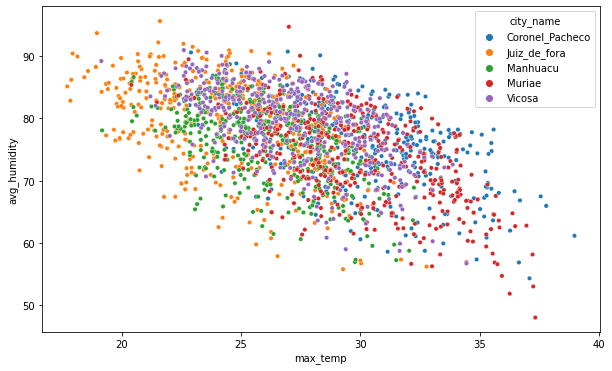

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="max_temp", y= "avg_humidity", hue = 'city_name',  s=20, data = df)

<AxesSubplot:xlabel='max_temp', ylabel='Gust'>

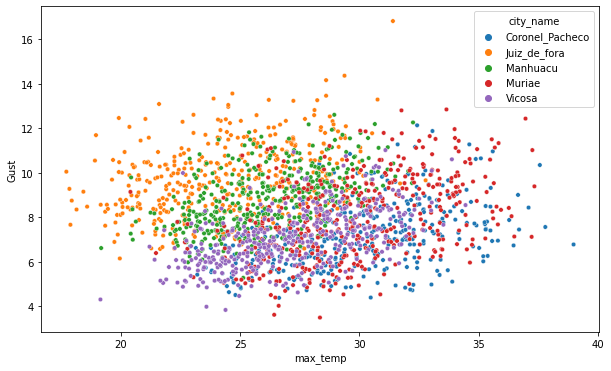

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="max_temp", y= "Gust", hue = 'city_name',  s=20, data = df)

<AxesSubplot:xlabel='max_temp', ylabel='rain'>

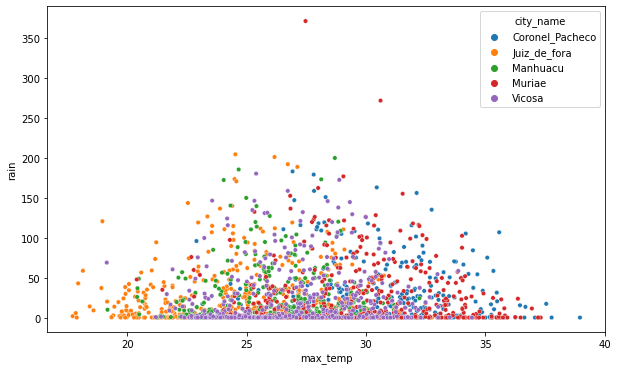

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="max_temp", y= "rain", hue = 'city_name',  s=20, data = df)

### Data transformation

In [28]:
#adjust pressure to sea level pressure

df['sea_level_pressure'] = 0
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2030 entries, 0 to 2029
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           2030 non-null   object 
 1   max_temp            2030 non-null   float64
 2   min_temp            2030 non-null   float64
 3   DTR                 2030 non-null   float64
 4   rain                2030 non-null   float64
 5   dew_point           2030 non-null   float64
 6   atm_pressure        2030 non-null   float64
 7   avg_humidity        2030 non-null   float64
 8   min_humidity        2030 non-null   float64
 9   Gust                2030 non-null   float64
 10  avg_wind            2030 non-null   float64
 11  weekofyear          2030 non-null   int64  
 12  year                2030 non-null   int64  
 13  month               2030 non-null   int64  
 14  week                2030 non-null   int64  
 15  altitude            2030 non-null   float64
 16  city_d

In [29]:
for row in range(df.shape[0]):
    pressuer = df.iloc[row, 6] # pressure at climate station
    height = df.iloc[row,15] # height of climate station
    temperature = df.iloc[row,2] # the temperature (min) during the pressure measurement
    sea_level_pressure = pressuer + ((pressuer * 9.80665 * height)/(287 * (273 + temperature + (height/400))))
    df.iloc[row, 19] = sea_level_pressure

In [30]:
df.head()

city_name   max_temp   min_temp        DTR    rain  dew_point  \
0  Coronel_Pacheco  30.500000  17.385000  13.115000   23.08  16.820833   
1  Coronel_Pacheco  33.800000  18.942857  14.857143    2.60  17.675595   
2  Coronel_Pacheco  30.942857  19.542857  11.400000   20.80  18.796429   
3  Coronel_Pacheco  27.257143  19.400000   7.857143  115.80  18.836310   
4  Coronel_Pacheco  26.542857  17.485714   9.057143  110.60  17.506548   

   atm_pressure  avg_humidity  min_humidity      Gust  avg_wind  weekofyear  \
0    965.955208     73.302083     40.250000  9.975000  1.661458      201242   
1    964.024405     67.529762     32.857143  8.271429  1.630357      201243   
2    962.893452     75.940476     49.285714  9.828571  1.503571      201244   
3    964.380953     81.071429     59.142857  8.442857  1.662500      201245   
4    964.815476     82.226190     57.285714  7.157143  1.369048      201246   

   year  month  week  altitude  city_dens  non_Dengue_cases  Dengue_cases  \
0  2012     10    42    411.14       23.5                 0             0   
1  2012     10    43    411.14       23.5                 0             0   
2  2012     10    44    411.14       23.5                 0             0   
3  2012     11    45    411.14       23.5                 0             0   
4  2012     11    46    411.14       23.5                 0             0   

   sea_level_pressure  
0         1012.522052  
1         1010.251046  
2         1008.971495  
3         1010.552646  
4         1011.311306

<AxesSubplot:xlabel='sea_level_pressure', ylabel='Count'>

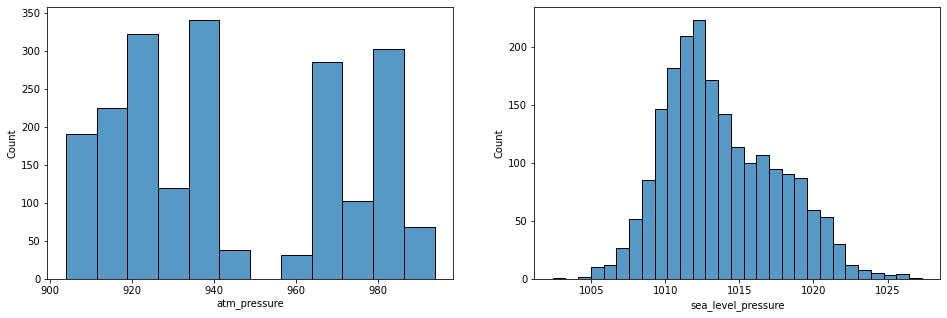

In [31]:
fig, axes = plt.subplots(1,2, figsize = (16,5))
sns.histplot(x ='atm_pressure', data =df, ax= axes[0])
sns.histplot(x ='sea_level_pressure', data =df, ax= axes[1])

In [32]:
# Log transformation to 'rain'. 
# rows with 0 will be replaced with 0.02 (smallest value after 0 is 0.04)

df['rain_log'] = df['rain']
df['rain_log'].mask(df['rain'] == 0, 0.02, inplace = True)
df['rain_log'].min()

0.02

In [33]:
df['rain_log'] = np.log10(df['rain_log'])
df['rain_log'].min()

-1.6989700043360187

<AxesSubplot:xlabel='rain_log', ylabel='Count'>

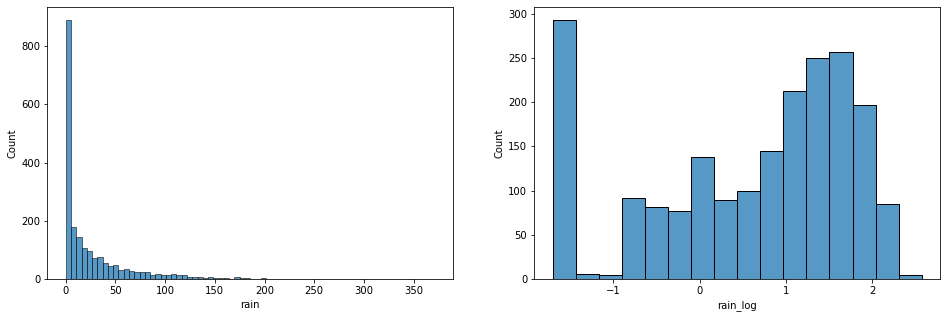

In [34]:
fig, axes = plt.subplots(1,2, figsize = (16,5))
sns.histplot(x ='rain', data =df, ax= axes[0])
sns.histplot(x ='rain_log', data =df, ax= axes[1])

In [35]:
# repeat correlation metrix
corrMatrix = df.corr(method = 'spearman')
corrMatrix.style.background_gradient(cmap='coolwarm')

Text(0.5, 1.0, 'Wind (avg)')

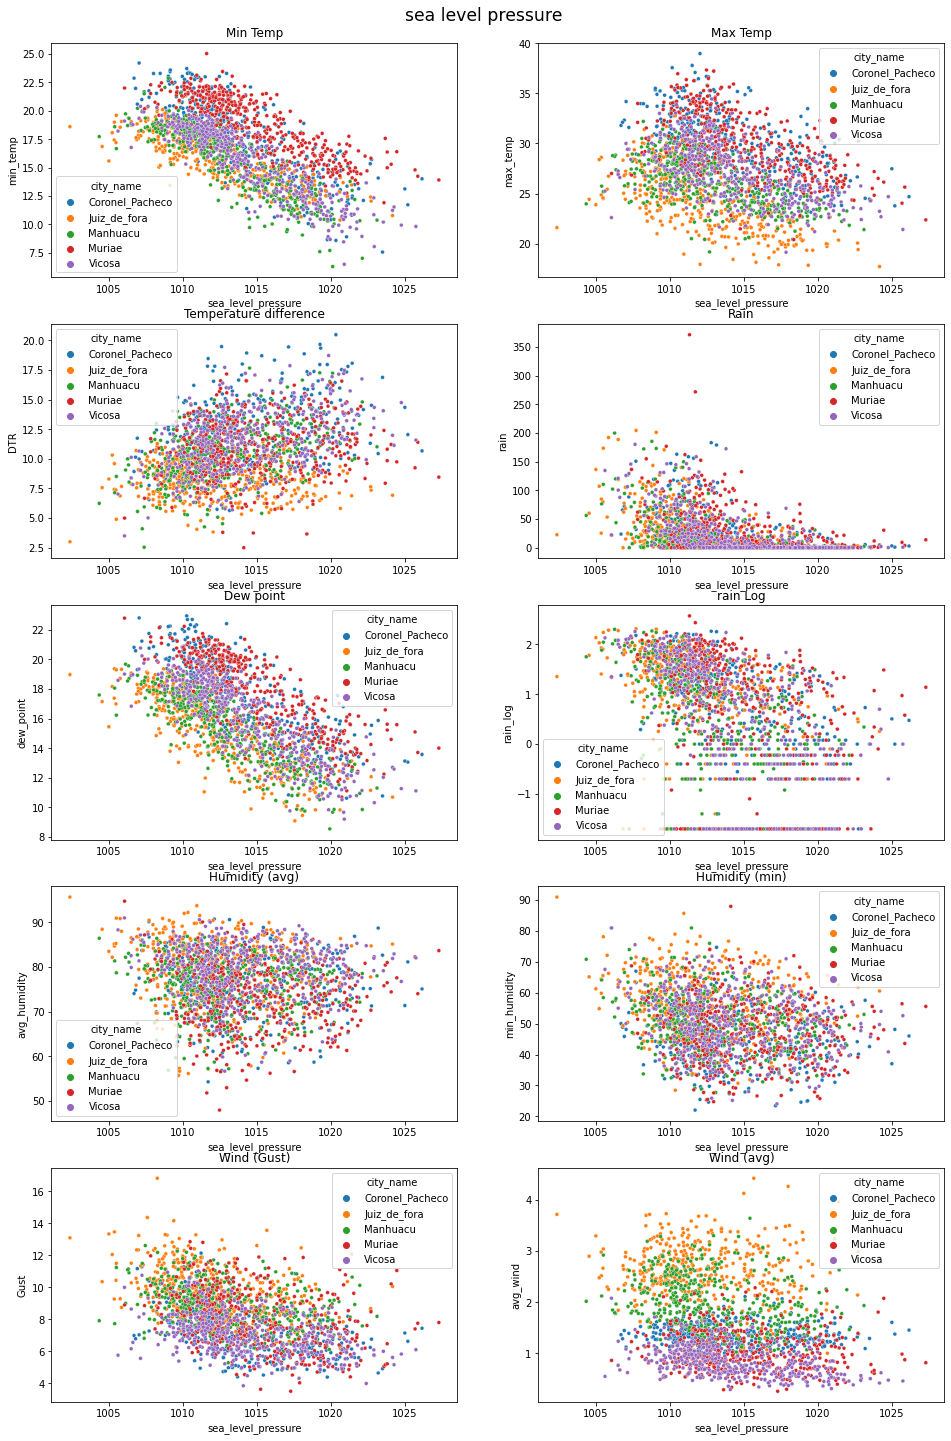

In [36]:
fig, axes = plt.subplots(5,2, figsize = (16,25))
fig.suptitle('sea level pressure', y= 0.9, fontsize =  'xx-large')
sns.scatterplot(y="min_temp", x= "sea_level_pressure", hue = 'city_name', data = df,  s=15, ax= axes[0,0])
axes[0,0].set_title("Min Temp")
sns.scatterplot(y="max_temp", x= "sea_level_pressure", hue = 'city_name', data = df, s=15, ax= axes[0,1])
axes[0,1].set_title("Max Temp")
sns.scatterplot(y="DTR", x= "sea_level_pressure", hue = 'city_name', data = df, s=15, ax= axes[1,0])
axes[1,0].set_title("Temperature difference")
sns.scatterplot(y="rain", x= "sea_level_pressure", hue = 'city_name',data = df, s=15, ax= axes[1,1])
axes[1,1].set_title("Rain")
sns.scatterplot(y="dew_point", x= "sea_level_pressure", hue = 'city_name', data = df,s=15,  ax= axes[2,0])
axes[2,0].set_title("Dew point")
sns.scatterplot(y="rain_log", x= "sea_level_pressure", hue = 'city_name', data = df,s=15, ax= axes[2,1])
axes[2,1].set_title("rain Log")
sns.scatterplot(y="avg_humidity", x= "sea_level_pressure",hue = 'city_name', data = df, s=15, ax= axes[3,0])
axes[3,0].set_title("Humidity (avg)")
sns.scatterplot(y="min_humidity", x= "sea_level_pressure", hue = 'city_name', data = df, s=15, ax= axes[3,1])
axes[3,1].set_title("Humidity (min)")
sns.scatterplot(y="Gust", x= "sea_level_pressure", hue = 'city_name', data = df, s=15, ax= axes[4,0])
axes[4,0].set_title("Wind (Gust)")
sns.scatterplot(y="avg_wind", x= "sea_level_pressure", hue = 'city_name', data = df, s=15, ax= axes[4,1])
axes[4,1].set_title("Wind (avg)")

Text(0.5, 1.0, 'Wind (avg)')

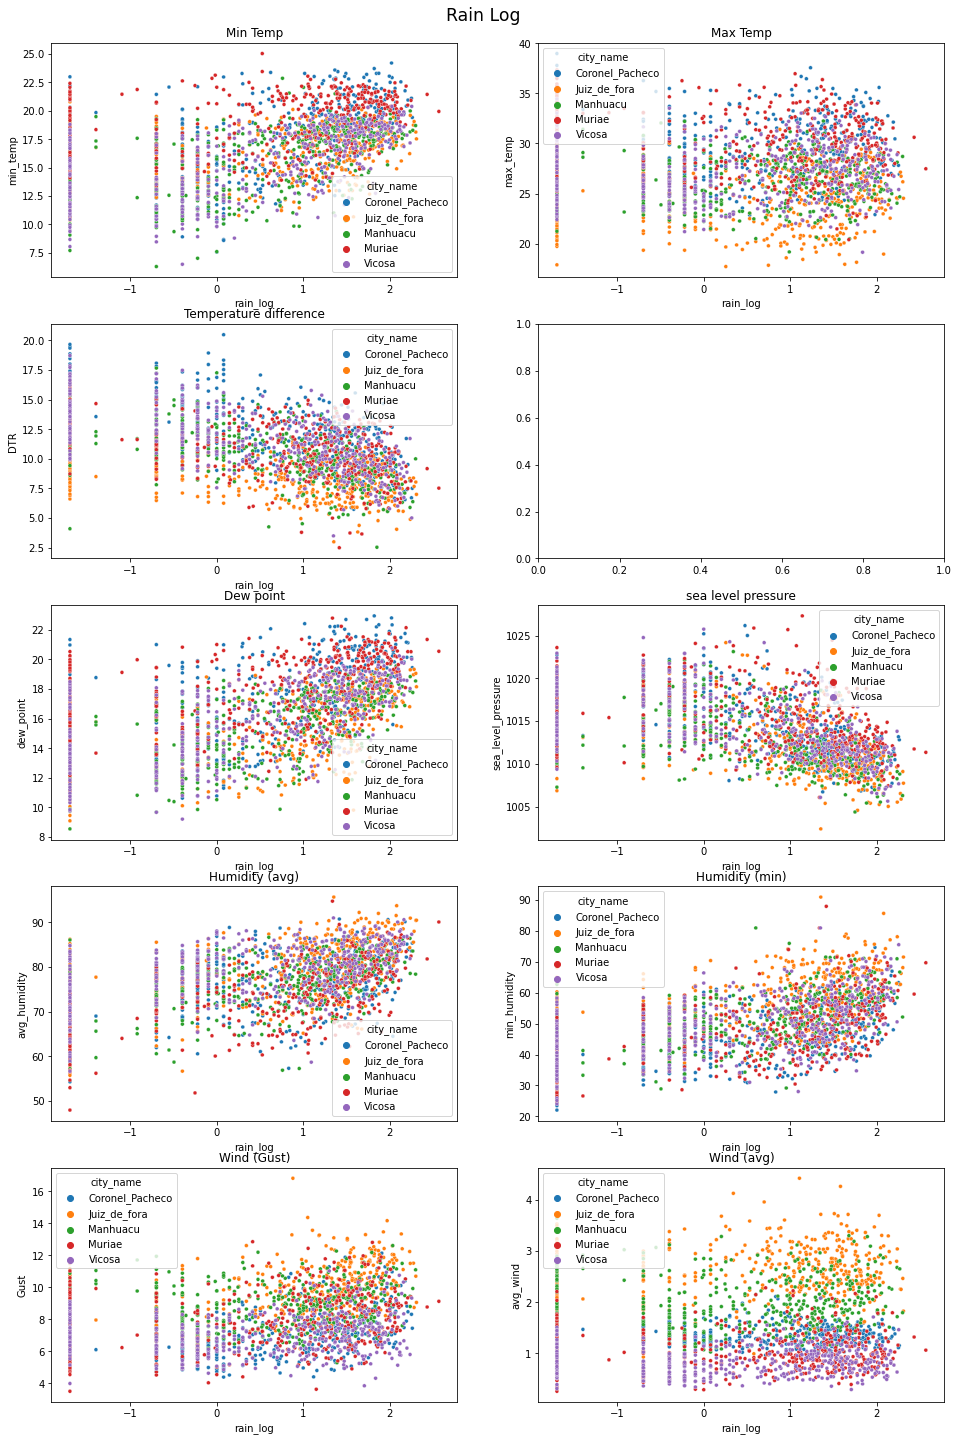

In [37]:
fig, axes = plt.subplots(5,2, figsize = (16,25))
fig.suptitle('Rain Log', y= 0.9, fontsize =  'xx-large')
sns.scatterplot(y="min_temp", x= "rain_log", hue = 'city_name', data = df, s=15, ax= axes[0,0])
axes[0,0].set_title("Min Temp")
sns.scatterplot(y="max_temp", x= "rain_log", hue = 'city_name', data = df, s=15, ax= axes[0,1])
axes[0,1].set_title("Max Temp")
sns.scatterplot(y="DTR", x= "rain_log", hue = 'city_name', data = df, s=15, ax= axes[1,0])
axes[1,0].set_title("Temperature difference")

sns.scatterplot(y="dew_point", x= "rain_log", hue = 'city_name', data = df, s=15, ax= axes[2,0])
axes[2,0].set_title("Dew point")
sns.scatterplot(x="rain_log", y= "sea_level_pressure", hue = 'city_name', s=15, data = df, ax= axes[2,1])
axes[2,1].set_title("sea level pressure")
sns.scatterplot(y="avg_humidity", x= "rain_log",hue = 'city_name', data = df,s=15, ax= axes[3,0])
axes[3,0].set_title("Humidity (avg)")
sns.scatterplot(y="min_humidity", x= "rain_log", hue = 'city_name', data = df,s=15, ax= axes[3,1])
axes[3,1].set_title("Humidity (min)")
sns.scatterplot(y="Gust", x= "rain_log", hue = 'city_name', data = df, s=15, ax= axes[4,0])
axes[4,0].set_title("Wind (Gust)")
sns.scatterplot(y="avg_wind", x= "rain_log", hue = 'city_name', data = df, s=15, ax= axes[4,1])
axes[4,1].set_title("Wind (avg)")

Text(0.5, 1.0, 'Wind (avg)')

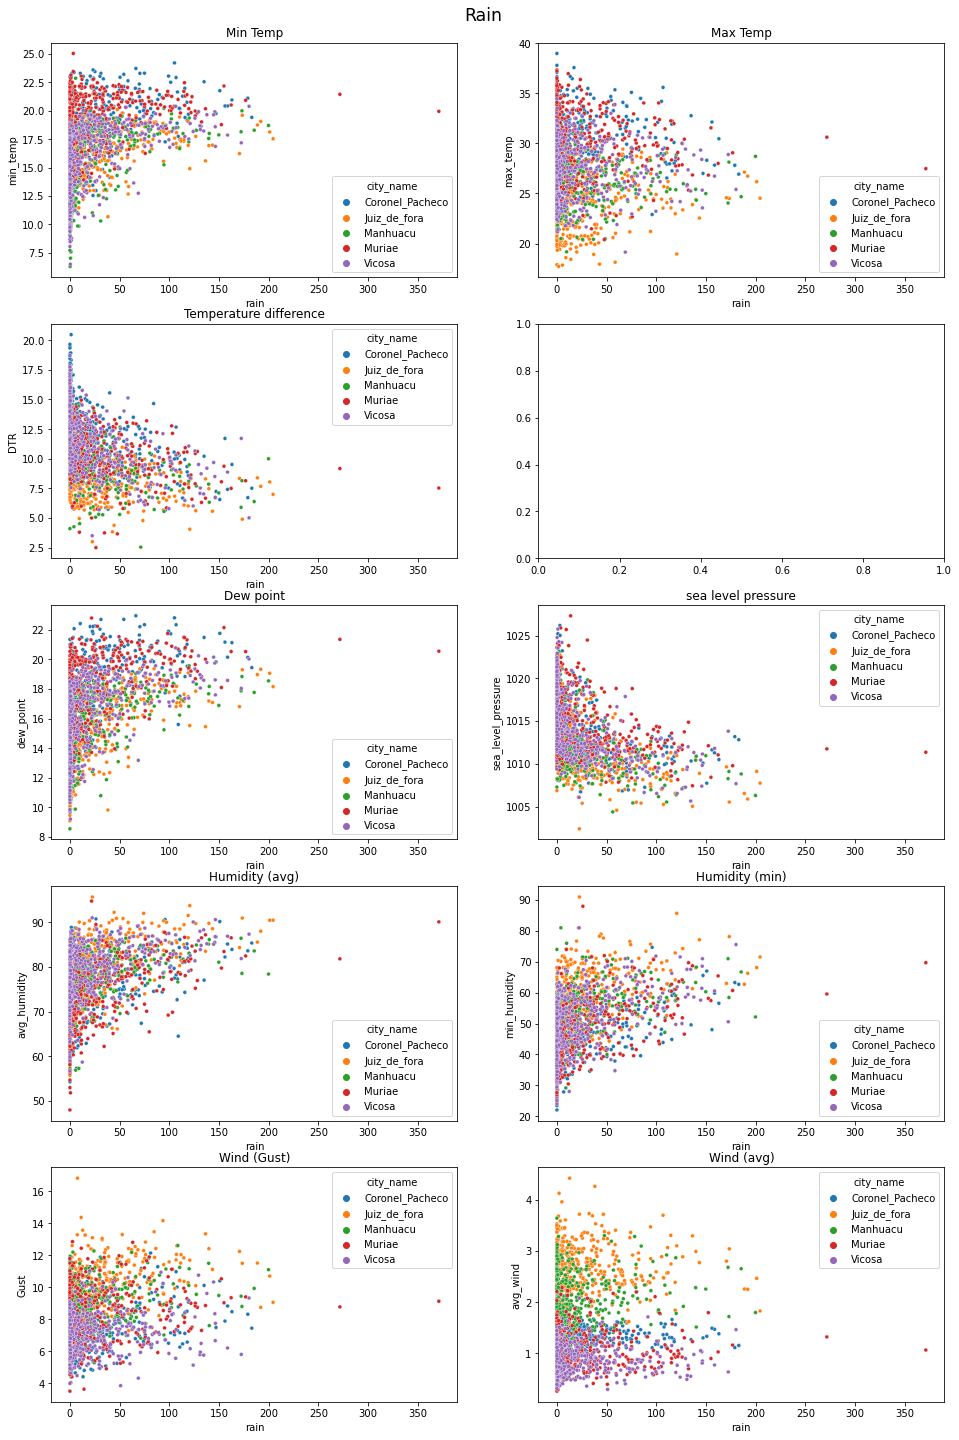

In [38]:
fig, axes = plt.subplots(5,2, figsize = (16,25))
fig.suptitle('Rain', y= 0.9, fontsize =  'xx-large')
sns.scatterplot(y="min_temp", x= "rain", hue = 'city_name', data = df, s=15, ax= axes[0,0])
axes[0,0].set_title("Min Temp")
sns.scatterplot(y="max_temp", x= "rain", hue = 'city_name', data = df, s=15, ax= axes[0,1])
axes[0,1].set_title("Max Temp")
sns.scatterplot(y="DTR", x= "rain", hue = 'city_name', data = df, s=15, ax= axes[1,0])
axes[1,0].set_title("Temperature difference")

sns.scatterplot(y="dew_point", x= "rain", hue = 'city_name', data = df, s=15, ax= axes[2,0])
axes[2,0].set_title("Dew point")
sns.scatterplot(x="rain", y= "sea_level_pressure", hue = 'city_name', data = df, s=15, ax= axes[2,1])
axes[2,1].set_title("sea level pressure")
sns.scatterplot(y="avg_humidity", x= "rain",hue = 'city_name', data = df, s=15, ax= axes[3,0])
axes[3,0].set_title("Humidity (avg)")
sns.scatterplot(y="min_humidity", x= "rain", hue = 'city_name', data = df, s=15, ax= axes[3,1])
axes[3,1].set_title("Humidity (min)")
sns.scatterplot(y="Gust", x= "rain", hue = 'city_name', data = df, s=15, ax= axes[4,0])
axes[4,0].set_title("Wind (Gust)")
sns.scatterplot(y="avg_wind", x= "rain", hue = 'city_name', data = df, s=15, ax= axes[4,1])
axes[4,1].set_title("Wind (avg)")

<AxesSubplot:xlabel='rain_log', ylabel='Dengue_cases'>

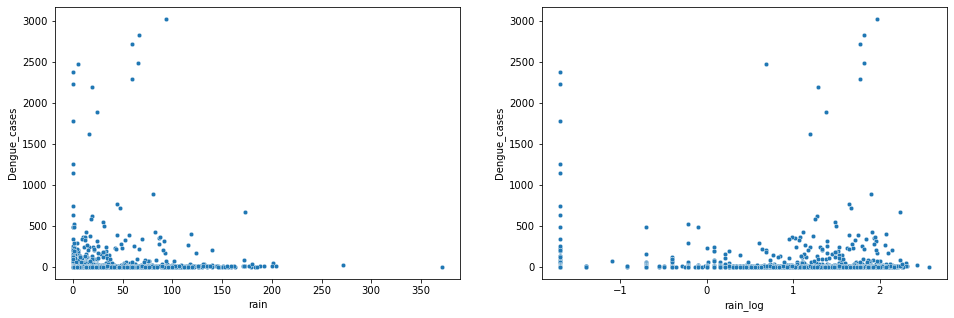

In [39]:
fig, axes = plt.subplots(1,2, figsize = (16,5))
sns.scatterplot(x="rain", y= "Dengue_cases", data = df, s=20, ax= axes[0])
sns.scatterplot(x="rain_log", y= "Dengue_cases" ,data = df, s= 20, ax= axes[1])


<AxesSubplot:xlabel='sea_level_pressure', ylabel='Dengue_cases'>

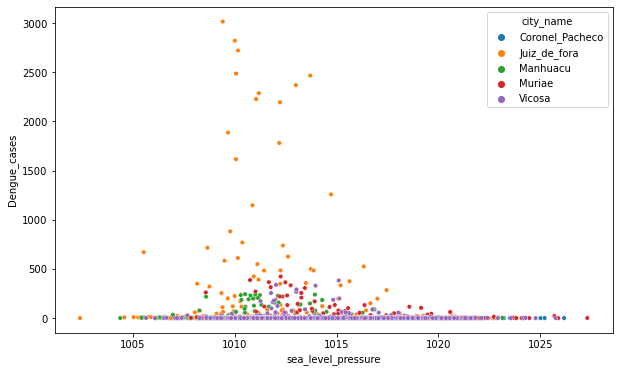

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="sea_level_pressure", y= "Dengue_cases", data = df, s= 20, hue = 'city_name')

In [41]:
df.head(10)

city_name   max_temp   min_temp        DTR    rain  dew_point  \
0  Coronel_Pacheco  30.500000  17.385000  13.115000   23.08  16.820833   
1  Coronel_Pacheco  33.800000  18.942857  14.857143    2.60  17.675595   
2  Coronel_Pacheco  30.942857  19.542857  11.400000   20.80  18.796429   
3  Coronel_Pacheco  27.257143  19.400000   7.857143  115.80  18.836310   
4  Coronel_Pacheco  26.542857  17.485714   9.057143  110.60  17.506548   
5  Coronel_Pacheco  28.585714  18.314286  10.271429   37.20  18.238095   
6  Coronel_Pacheco  28.642857  19.271429   9.371429   70.20  19.186309   
7  Coronel_Pacheco  32.157143  20.285714  11.871429   26.80  20.267262   
8  Coronel_Pacheco  31.600000  20.985714  10.614286   88.40  21.239286   
9  Coronel_Pacheco  32.428571  20.428571  12.000000   13.00  20.659524   

   atm_pressure  avg_humidity  min_humidity       Gust  ...  weekofyear  year  \
0    965.955208     73.302083     40.250000   9.975000  ...      201242  2012   
1    964.024405     67.529762     32.857143   8.271429  ...      201243  2012   
2    962.893452     75.940476     49.285714   9.828571  ...      201244  2012   
3    964.380953     81.071429     59.142857   8.442857  ...      201245  2012   
4    964.815476     82.226190     57.285714   7.157143  ...      201246  2012   
5    964.226786     78.940476     52.428571   7.285714  ...      201247  2012   
6    964.373810     81.547619     54.428571   8.671429  ...      201248  2012   
7    963.861309     76.744048     45.142857   8.785714  ...      201249  2012   
8    961.466071     83.720238     53.571429  11.285714  ...      201250  2012   
9    963.438690     77.773810     45.714286   8.857143  ...      201251  2012   

   month  week  altitude  city_dens  non_Dengue_cases  Dengue_cases  \
0     10    42    411.14       23.5                 0             0   
1     10    43    411.14       23.5                 0             0   
2     10    44    411.14       23.5                 0             0   
3     11    45    411.14       23.5                 0             0   
4     11    46    411.14       23.5                 0             0   
5     11    47    411.14       23.5                 0             0   
6     11    48    411.14       23.5                 0             0   
7     12    49    411.14       23.5                 0             0   
8     12    50    411.14       23.5                 0             0   
9     12    51    411.14       23.5                 0             0   

   sea_level_pressure  rain_log  
0         1012.522052  1.363236  
1         1010.251046  0.414973  
2         1008.971495  1.318063  
3         1010.552646  2.063709  
4         1011.311306  2.043755  
5         1010.562545  1.570543  
6         1010.565401  1.846337  
7         1009.869249  1.428135  
8         1007.250784  1.946452  
9         1009.404145  1.113943  

[10 rows x 21 columns]

In [42]:
df.to_csv("initial_flat_file_t12.csv", index = False)